In [52]:
pip install pandas matplotlib seaborn statsmodels scikit-learn

#### **3. Elasticidad del Precio**

**Elasticidad Precio-Demanda por Año**

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"

import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar datos
data = pd.read_csv("/content/CSV/avocado.csv")

# Convertir la columna 'Date' al formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Crear columnas adicionales para análisis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Vista previa de los datos
print(data)

cc = data.copy()

       Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  

In [54]:
# Step 1: Define the unique regions and manually classify them
region_classification = {
    'Albany': 'City',
    'Atlanta': 'City',
    'BaltimoreWashington': 'Region',
    'Boise': 'City',
    'Boston': 'City',
    'BuffaloRochester': 'Region',
    'California': 'GreaterRegion',
    'Charlotte': 'City',
    'Chicago': 'City',
    'CincinnatiDayton': 'Region',
    'Columbus': 'City',
    'DallasFtWorth': 'Region',
    'Denver': 'City',
    'Detroit': 'City',
    'GrandRapids': 'City',
    'GreatLakes': 'GreaterRegion',
    'HarrisburgScranton': 'Region',
    'HartfordSpringfield': 'Region',
    'Houston': 'City',
    'Indianapolis': 'City',
    'Jacksonville': 'City',
    'LasVegas': 'City',
    'LosAngeles': 'City',
    'Louisville': 'City',
    'MiamiFtLauderdale': 'Region',
    'Midsouth': 'GreaterRegion',
    'Nashville': 'City',
    'NewOrleansMobile': 'Region',
    'NewYork': 'City',
    'Northeast': 'GreaterRegion',
    'NorthernNewEngland': 'Region',
    'Orlando': 'City',
    'Philadelphia': 'City',
    'PhoenixTucson': 'Region',
    'Pittsburgh': 'City',
    'Plains': 'GreaterRegion',
    'Portland': 'City',
    'RaleighGreensboro': 'Region',
    'RichmondNorfolk': 'Region',
    'Roanoke': 'City',
    'Sacramento': 'City',
    'SanDiego': 'City',
    'SanFrancisco': 'City',
    'Seattle': 'City',
    'SouthCarolina': 'State',
    'SouthCentral': 'GreaterRegion',
    'Southeast': 'GreaterRegion',
    'Spokane': 'City',
    'StLouis': 'City',
    'Syracuse': 'City',
    'Tampa': 'City',
    'TotalUS': 'TotalUS',
    'West': 'GreaterRegion',
    'WestTexNewMexico': 'Region'
}
def get_regions(name):
  cat_region = region_classification.get(name)
  return cat_region

In [55]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['region_type'] = df['region'].transform(lambda x: get_regions(x))

In [56]:
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()
df_tot = df.loc[df['region_type'] == 'TotalUS'].copy()

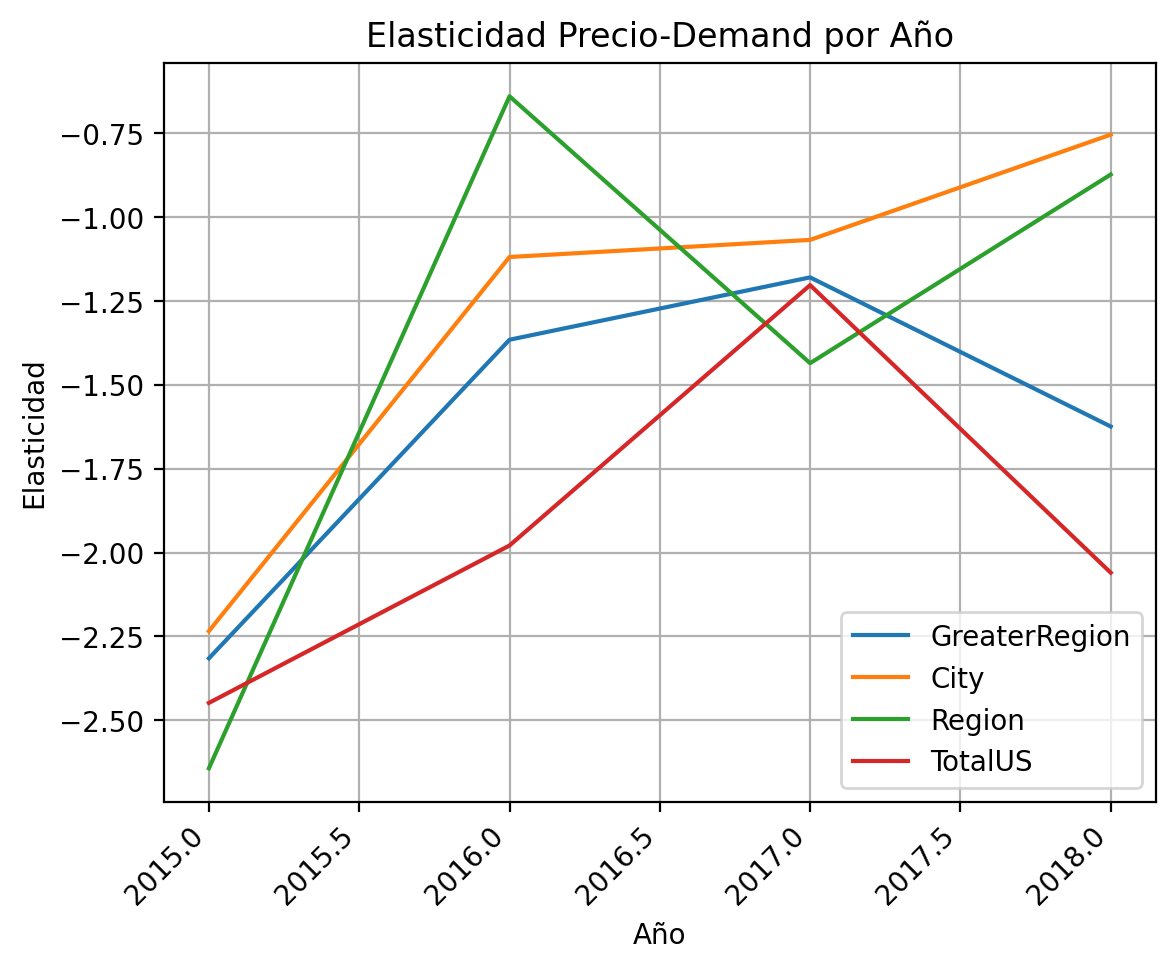

In [13]:
dfs = [df_reduced, df_cities, df_regions, df_tot]
labels = ['GreaterRegion', 'City', 'Region', 'TotalUS']

for df, label in zip(dfs, labels):
    # Calcular variación porcentual
    df['Price_pct_change'] = df['AveragePrice'].pct_change()
    df['Volume_pct_change'] = df['Total Volume'].pct_change()

    # Calcular elasticidad y gestionar ceros y bulos
    df['Elasticity'] = df['Volume_pct_change'] / df['Price_pct_change']

    # Quitar NaN y valores infinitos
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Quitar NaN de Elasticity
    df.dropna(subset=['Elasticity'], inplace=True)

    # Agrupar por año y calcular media de Elasticity
    elasticity_by_year = df.groupby(df['Date'].dt.to_period('Y'))['Elasticity'].mean().reset_index()
    elasticity_by_year['Year'] = elasticity_by_year['Date'].dt.year

    # Dibujar elasticity
    plt.plot(elasticity_by_year['Year'], elasticity_by_year['Elasticity'], label=label)

# Titulo y etiquetas
plt.xlabel('Año')
plt.ylabel('Elasticidad')
plt.title('Elasticidad Precio-Demand por Año')
plt.xticks(rotation=45, ha='right')  # mejorar legibilidad
plt.legend()
plt.grid(True)
plt.show()

**Comparación de Elasticidad en Diferentes Mercados**

<ipython-input-26-1635f6a7bb98>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regions_data, x='region', y='Elasticity', palette='coolwarm')


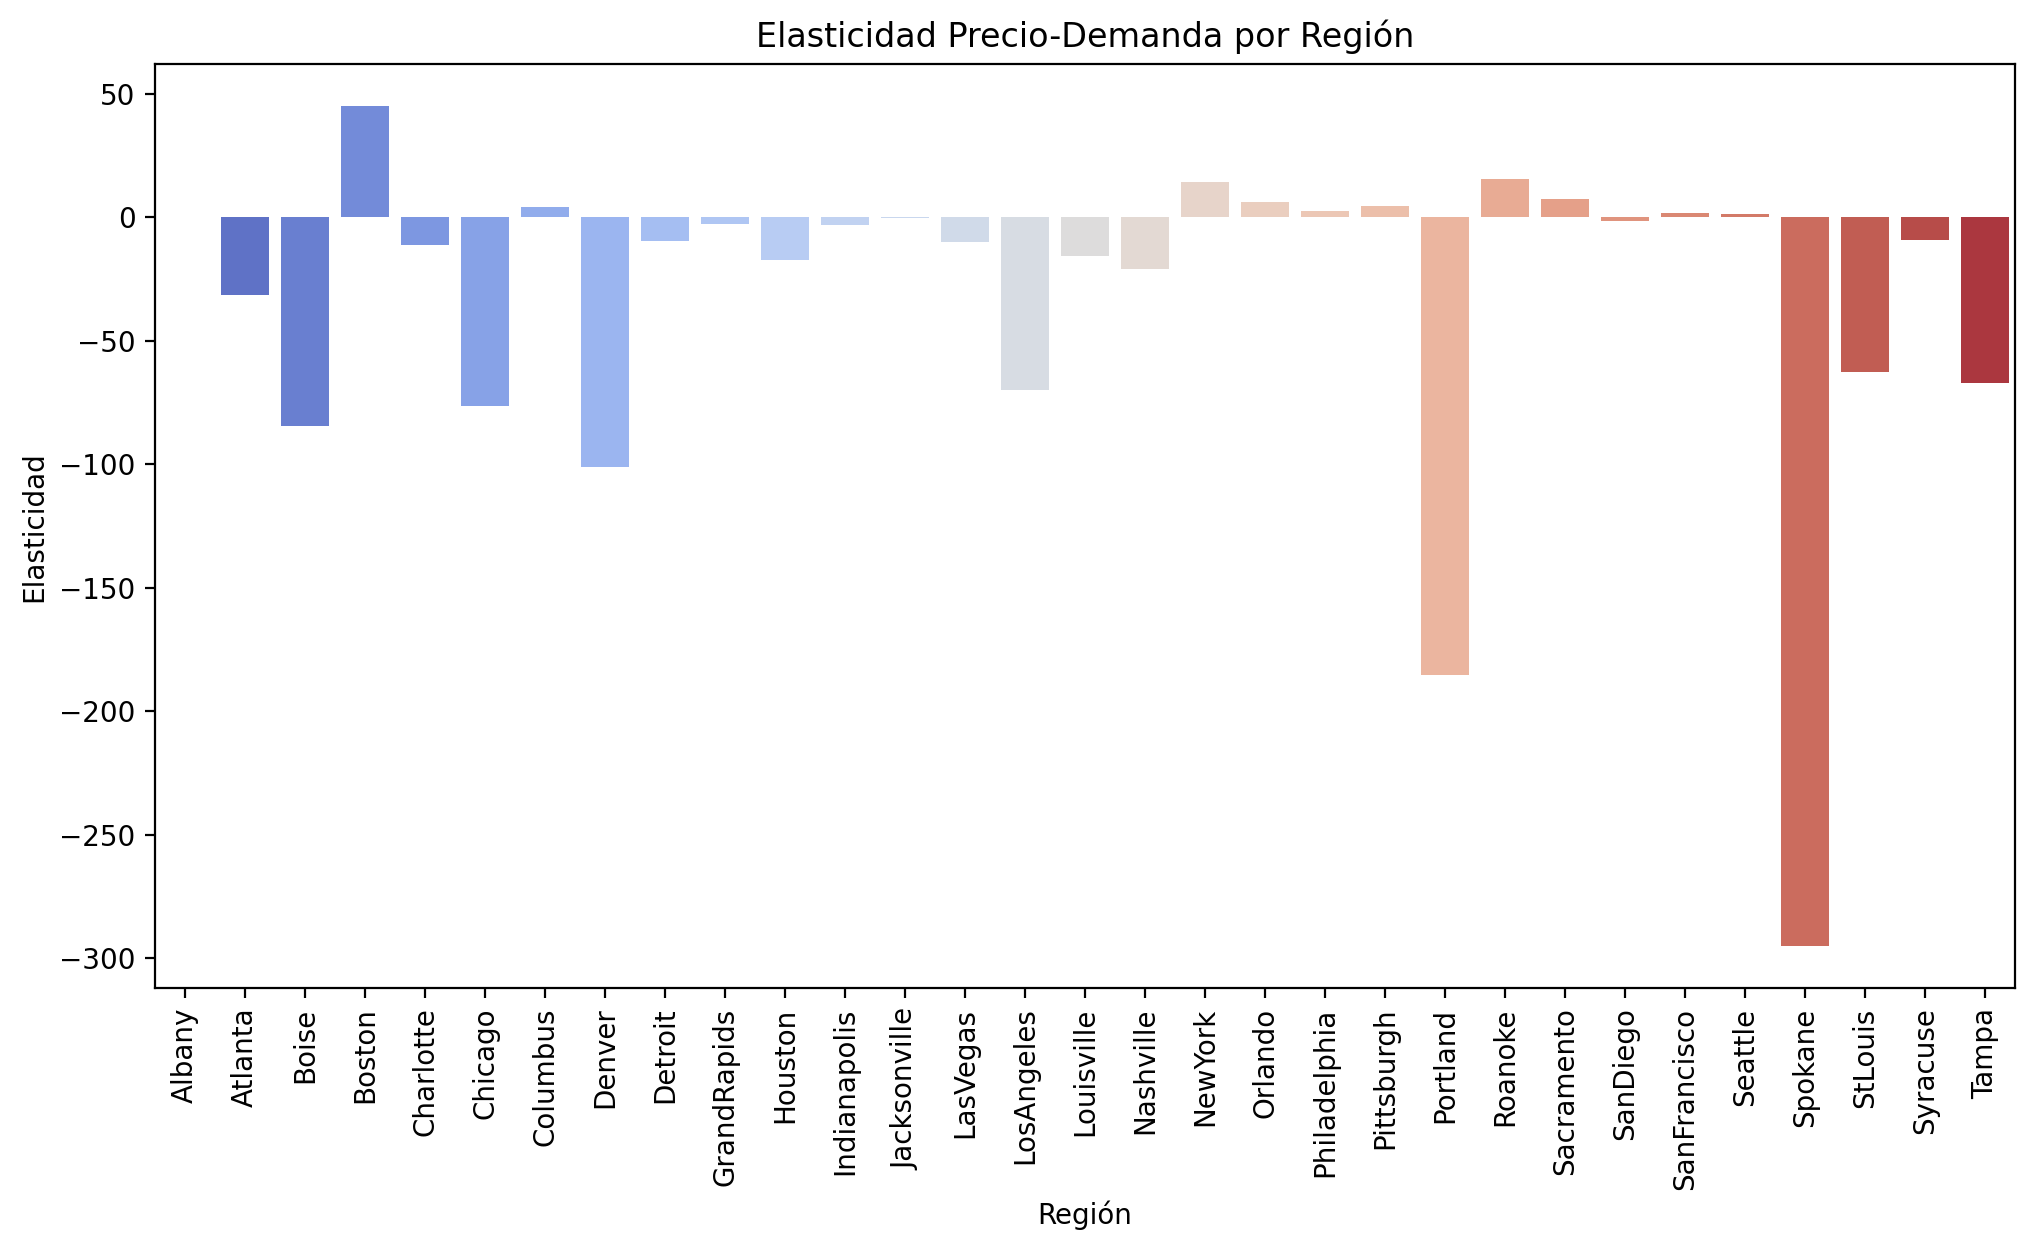

In [26]:
# Agrupar por región y calcular elasticidad
regions_data = df_cities.groupby('region').agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Calcular variaciones porcentuales
regions_data['Price Change (%)'] = regions_data['AveragePrice'].pct_change()
regions_data['Demand Change (%)'] = regions_data['Total Volume'].pct_change()

# Elasticidad por región
regions_data['Elasticity'] = regions_data['Demand Change (%)'] / regions_data['Price Change (%)']

# Visualizar en un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=regions_data, x='region', y='Elasticity', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Elasticidad Precio-Demanda por Región')
plt.xlabel('Región')
plt.ylabel('Elasticidad')
plt.show()

**Elasticidad a Nivel de Tipo de Bolsa**

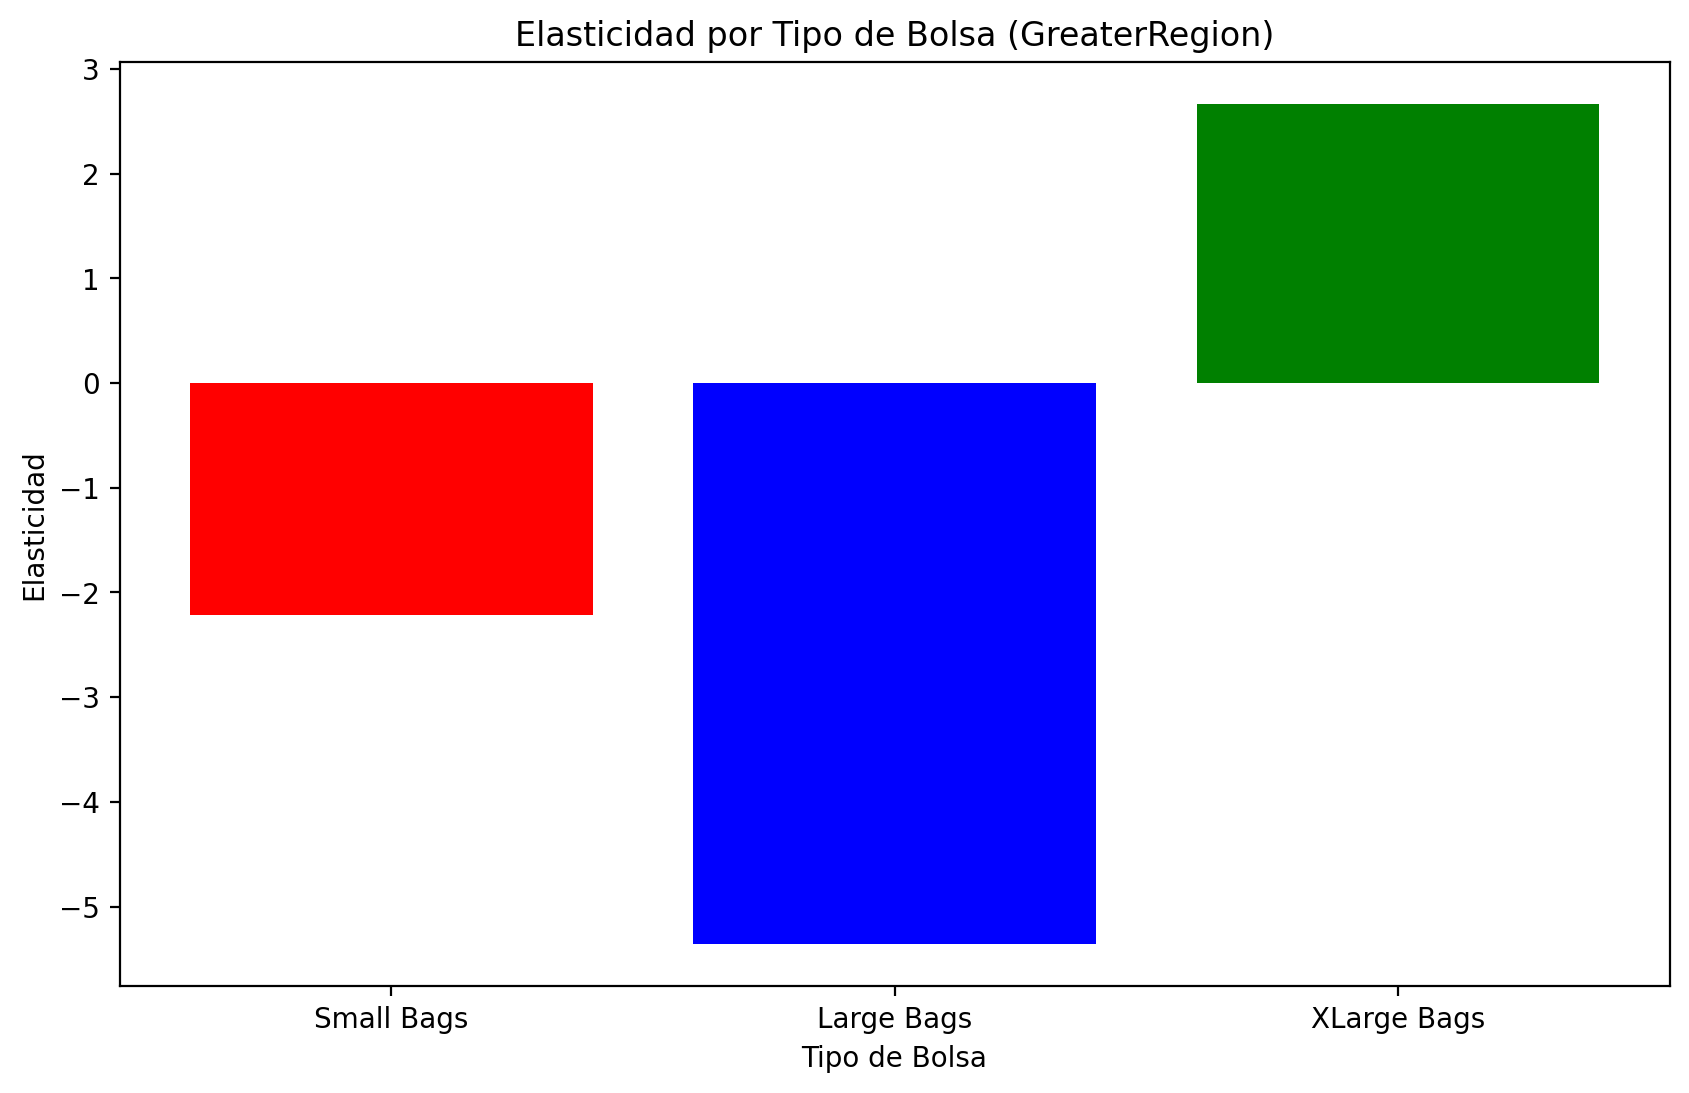

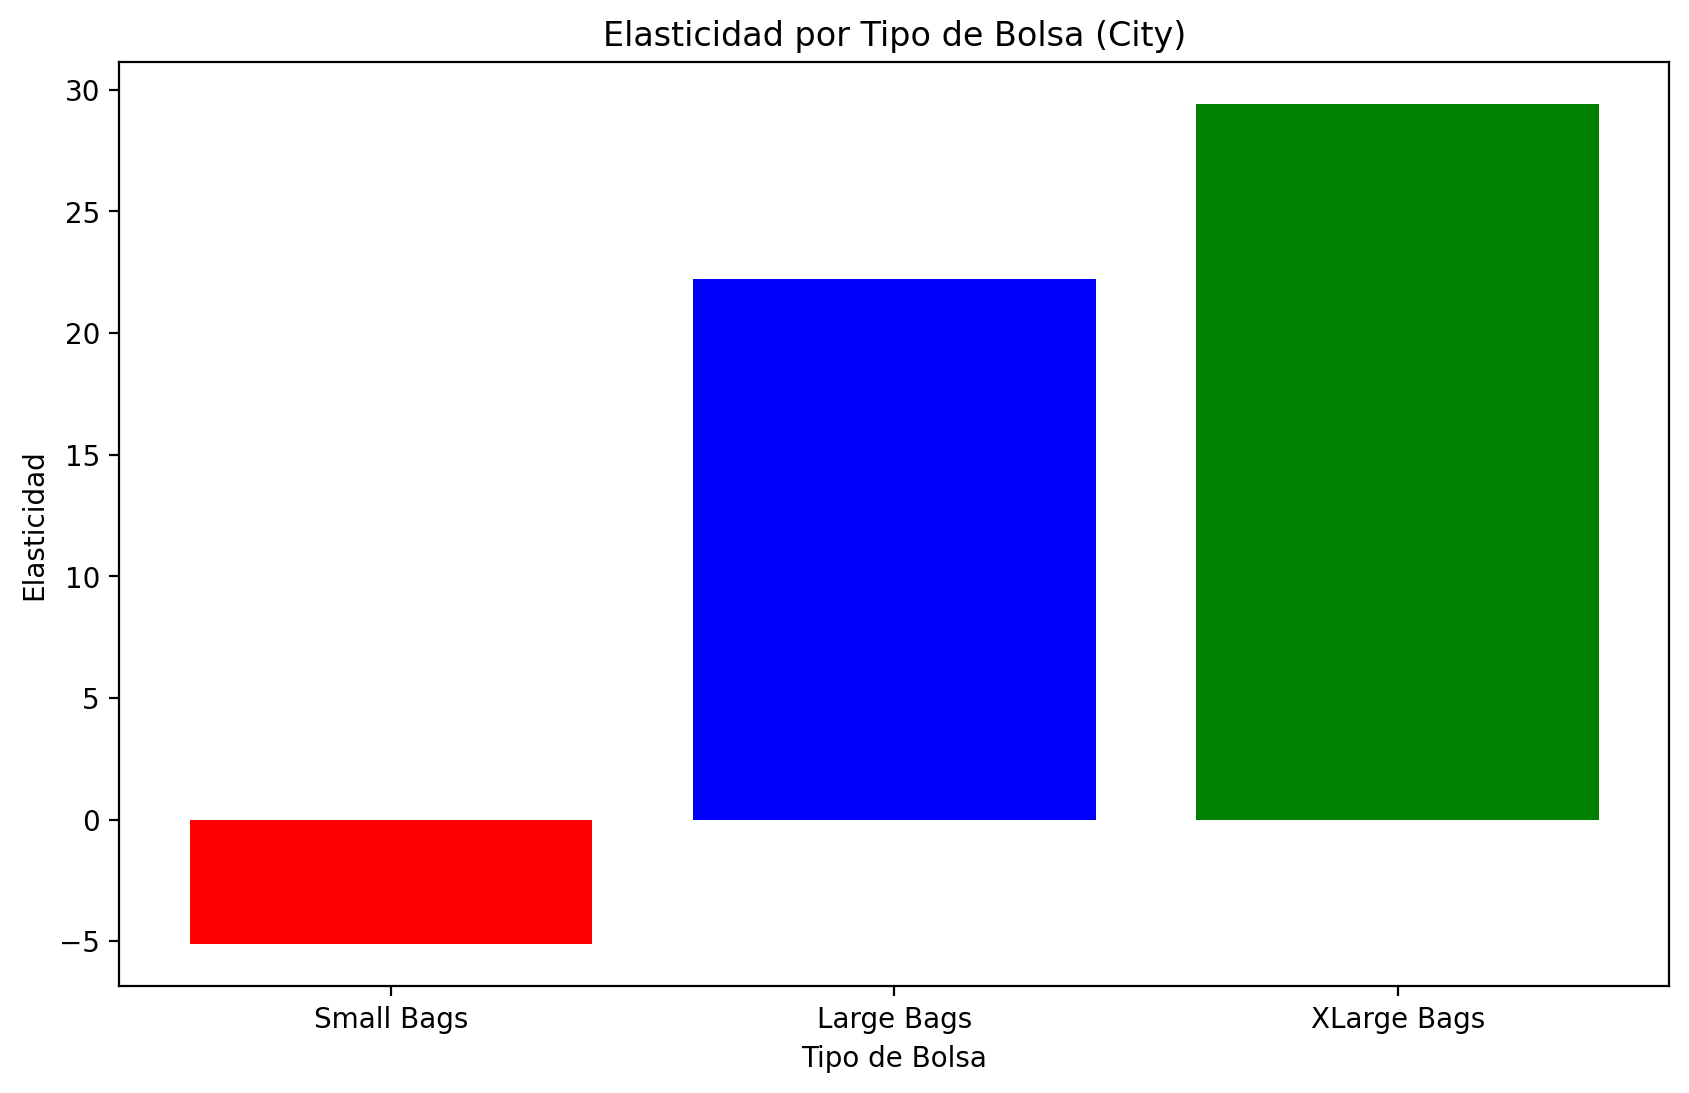

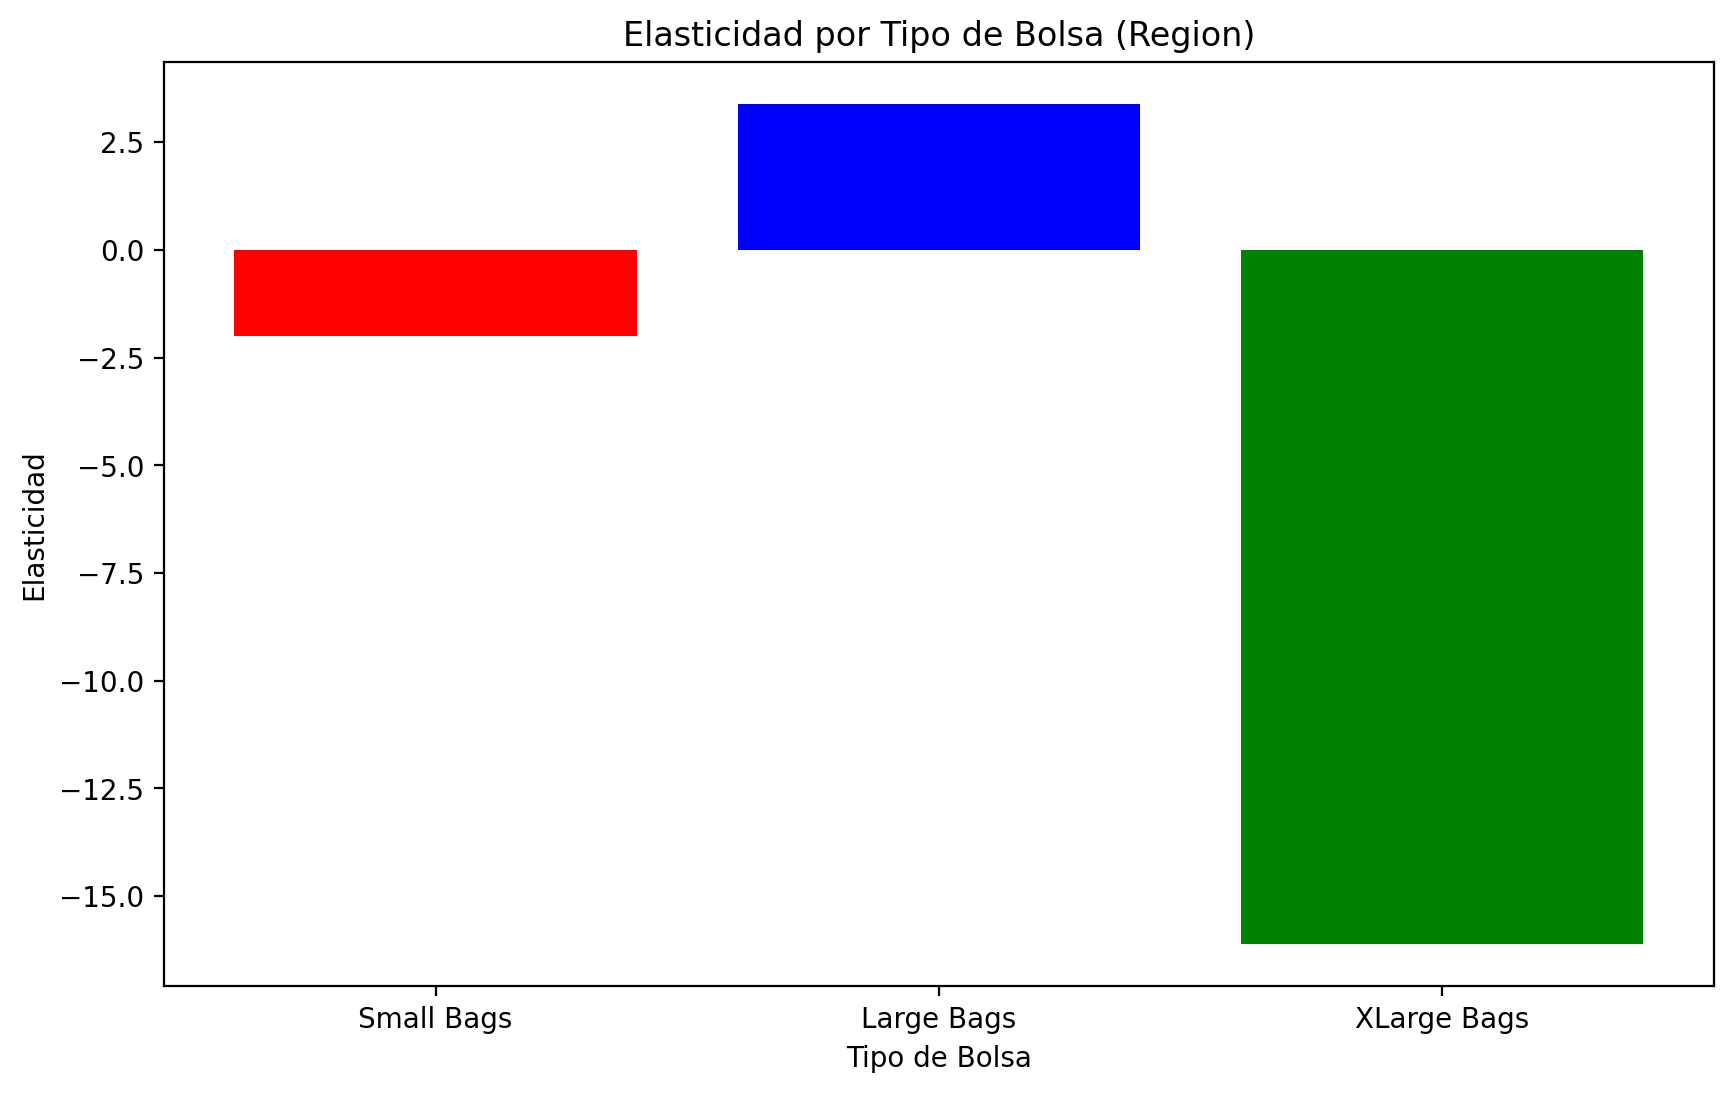

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

bag_types = ['Small Bags', 'Large Bags', 'XLarge Bags']
dfs = [df_reduced, df_cities, df_regions]
labels = ['GreaterRegion', 'City', 'Region']


for df, label in zip(dfs, labels):
    # agrupar por fecha y sumar por AveragePrice
    df_bags = df.groupby('Date')[bag_types + ["AveragePrice"]].sum().reset_index()

    # Elasticidad por tipo de bolsa
    elasticities = {}
    for bag_type in bag_types:
        df_bags['Price_pct_change'] = df_bags['AveragePrice'].pct_change()
        df_bags['Volume_pct_change'] = df_bags[bag_type].pct_change()
        df_bags['Elasticity'] = df_bags['Volume_pct_change'] / df_bags['Price_pct_change']

        # quitar infinitos y NaNs
        df_bags.replace([np.inf, -np.inf], np.nan, inplace=True)
        df_bags.dropna(subset=['Elasticity'], inplace=True)

        # Cacular elasticidad media
        elasticities[bag_type] = df_bags['Elasticity'].mean()

    # Gráfico de barras comparativo
    colors = ['red', 'blue', 'green', 'orange']  # Lista de colores
    plt.figure(figsize=(10, 6))
    plt.bar(elasticities.keys(), elasticities.values(), color=colors[:len(elasticities)])
    plt.title(f'Elasticidad por Tipo de Bolsa ({label})')
    plt.xlabel('Tipo de Bolsa')
    plt.ylabel('Elasticidad')
    plt.show()

**Elasticidad Comparativa entre Orgánicos y Convencionales**

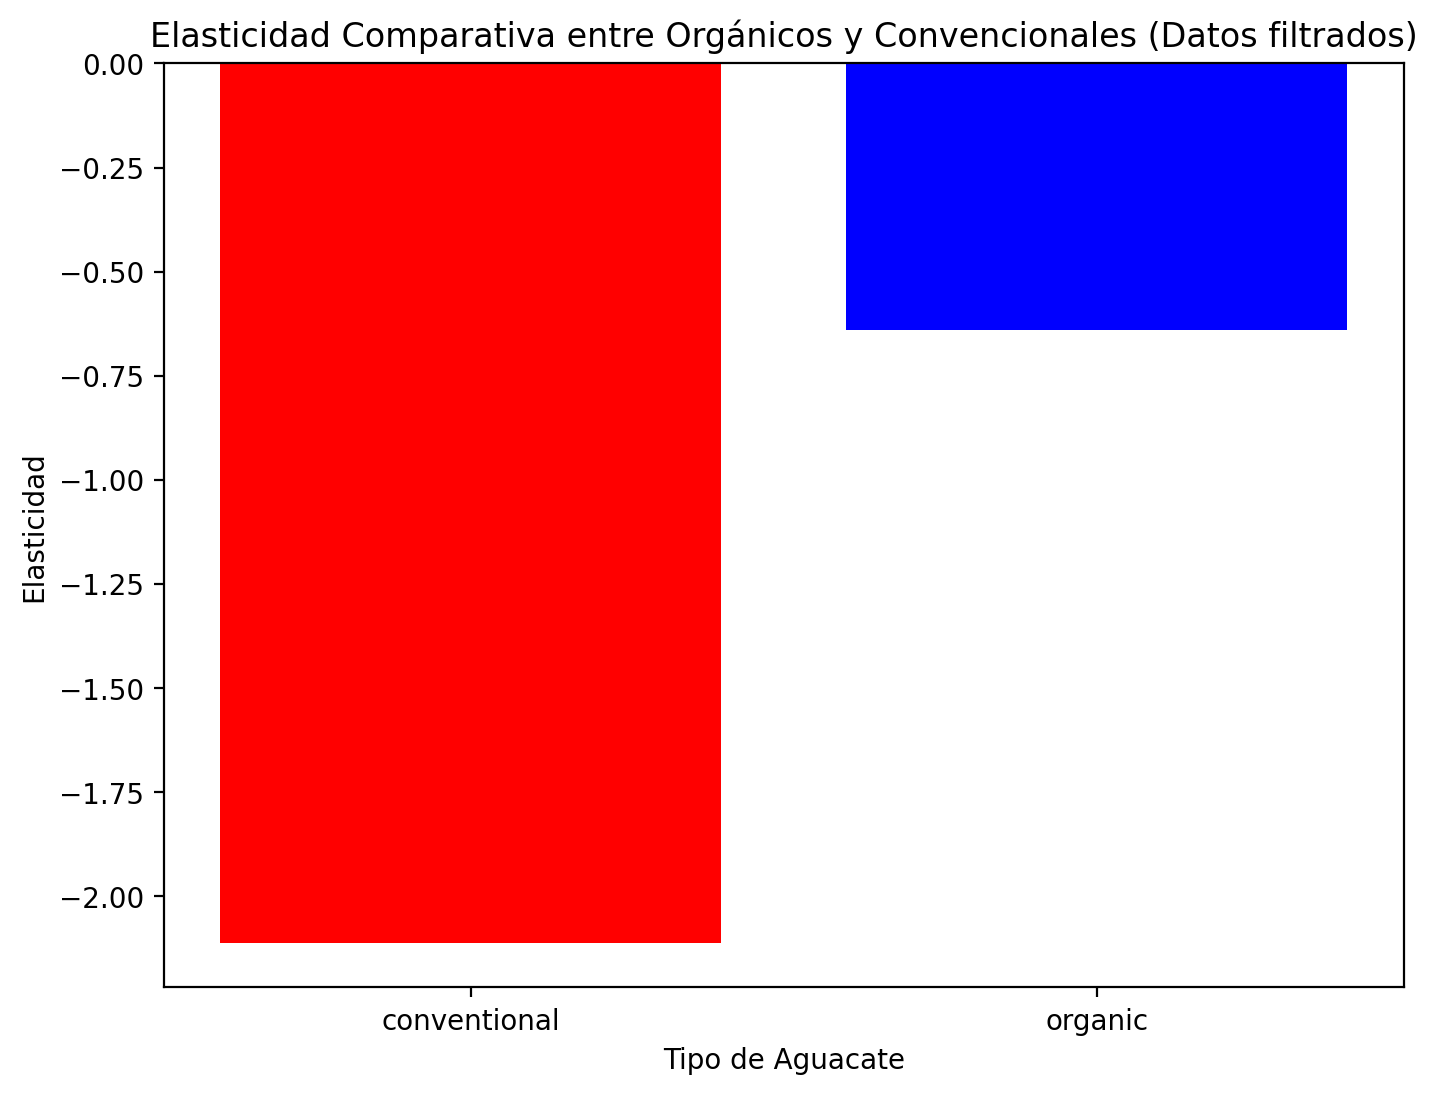

In [92]:
import matplotlib.pyplot as plt
import numpy as np

dfs = [cc]
labels = ['Datos filtrados']

for df, label in zip(dfs, labels):
    # Agrupando por tipo y calcular la elasticidad
    elasticities = {}
    for avocado_type in df['type'].unique():
        # Crear una copia de seguridad
        df_type = df[df['type'] == avocado_type].copy()

        # Calcular porcetage usando .loc
        df_type.loc[:, 'Price_pct_change'] = df_type['AveragePrice'].pct_change()
        df_type.loc[:, 'Volume_pct_change'] = df_type['Total Volume'].pct_change()
        df_type.loc[:, 'Elasticity'] = df_type['Volume_pct_change'] / df_type['Price_pct_change']

        # elminar ceros, infinitos y NaN
        df_type.replace([np.inf, -np.inf], np.nan, inplace=True)
        df_type.dropna(subset=['Elasticity'], inplace=True)

        # calcular elasticidad media
        elasticities[avocado_type] = df_type['Elasticity'].mean()

    # Dibujo del gráfico comparativo
    colors = ['red', 'blue']   # Lista de colores
    plt.figure(figsize=(8, 6))
    plt.bar(elasticities.keys(), elasticities.values(), color=colors[:len(elasticities)])
    plt.title(f'Elasticidad Comparativa entre Orgánicos y Convencionales ({label})')
    plt.xlabel('Tipo de Aguacate')
    plt.ylabel('Elasticidad')
    plt.show()

**Elasticidad Precios-Ventas (Relación General)**

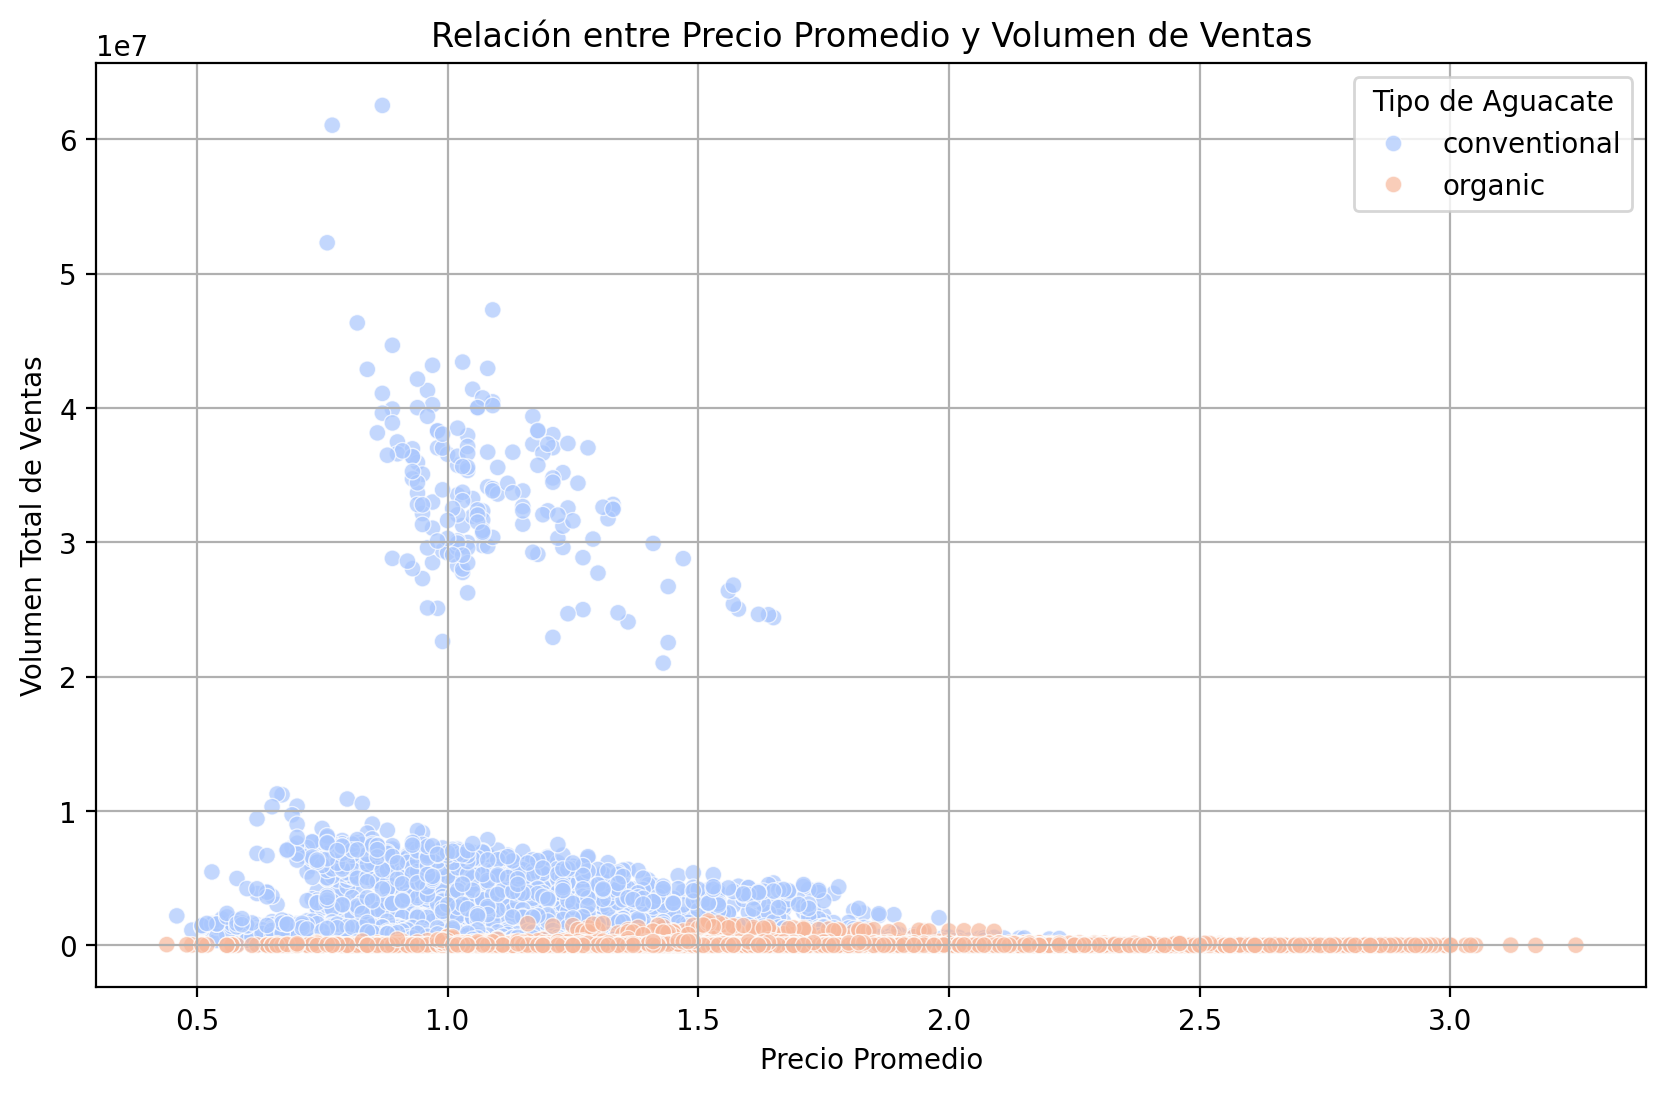

In [94]:
# Gráfico de dispersión para elasticidad precios-ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AveragePrice', y='Total Volume', hue='type', palette='coolwarm', alpha=0.7)
plt.title('Relación entre Precio Promedio y Volumen de Ventas')
plt.xlabel('Precio Promedio')
plt.ylabel('Volumen Total de Ventas')
plt.legend(title='Tipo de Aguacate')
plt.grid()
plt.show()